In [2]:
from data_treat.get_ready_data import get_data, get_data_for_analiz
import pandas as pd
import matplotlib.pyplot as plt
from data_treat.data_normalizer import CustomNormalizer
from data_treat.util_class import ThreeQRule


In [3]:
COLUMNS = ["distance_from_home","distance_from_last_transaction","ratio_to_median_purchase_price",
           "repeat_retailer","used_chip","used_pin_number","online_order","fraud"]

In [4]:
#data = get_data_for_analiz()


In [5]:
data = get_data()

In [6]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
844787,0.981454,5.584345,5.172787,0.0,0.0,0.0,1.0,1.0
771372,115.945937,0.286868,0.631719,1.0,0.0,0.0,1.0,1.0
39820,4.380972,0.248144,1.152292,1.0,1.0,0.0,1.0,0.0
7128,75.265717,0.246998,0.815920,1.0,0.0,0.0,0.0,0.0
91364,13.376858,3.547137,0.748160,1.0,1.0,0.0,0.0,0.0


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,174806.0,44.596086,104.753108,0.021322,4.137164,11.754798,37.594545,10632.723672
distance_from_last_transaction,174806.0,8.502264,36.772105,0.000407,0.309630,1.063041,3.811184,2160.499922
ratio_to_median_purchase_price,174806.0,3.713906,4.755045,0.011373,0.690949,2.006738,5.236790,266.689692
repeat_retailer,174806.0,0.881383,0.323338,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,174806.0,0.308216,0.461758,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,174806.0,0.057916,0.233585,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,174806.0,0.784327,0.411290,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,174806.0,0.500000,0.500001,0.000000,0.000000,0.500000,1.000000,1.000000


In [8]:
data[data["fraud"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data[data["fraud"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,22.930296,54.282821,0.021322,3.822535,9.680077,24.171278,4601.011222
distance_from_last_transaction,87403.0,4.292344,19.109284,0.000655,0.292846,0.979638,3.231463,2119.899612
ratio_to_median_purchase_price,87403.0,1.421488,1.936245,0.011373,0.450231,0.912264,1.784076,72.027657
repeat_retailer,87403.0,0.882647,0.321842,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.360033,0.480012,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.112708,0.316237,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.622336,0.484806,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,87403.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
Normilized_data = pd.DataFrame(CustomNormalizer.normalize(data),columns=COLUMNS)

In [11]:
q3_data = ThreeQRule(Normilized_data).get_data()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [1]:
Normilized_data.head()

NameError: name 'Normilized_data' is not defined

In [11]:
Normilized_data.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,174806.0,0.004192,0.009852,0.0,0.000387,0.001104,0.003534,1.0
distance_from_last_transaction,174806.0,0.003935,0.017020,0.0,0.000143,0.000492,0.001764,1.0
ratio_to_median_purchase_price,174806.0,0.013884,0.017831,0.0,0.002548,0.007482,0.019594,1.0
repeat_retailer,174806.0,0.881383,0.323338,0.0,1.000000,1.000000,1.000000,1.0
used_chip,174806.0,0.308216,0.461758,0.0,0.000000,0.000000,1.000000,1.0
used_pin_number,174806.0,0.057916,0.233585,0.0,0.000000,0.000000,0.000000,1.0
online_order,174806.0,0.784327,0.411290,0.0,1.000000,1.000000,1.000000,1.0
fraud,174806.0,0.500000,0.500001,0.0,0.000000,0.500000,1.000000,1.0


<AxesSubplot:>

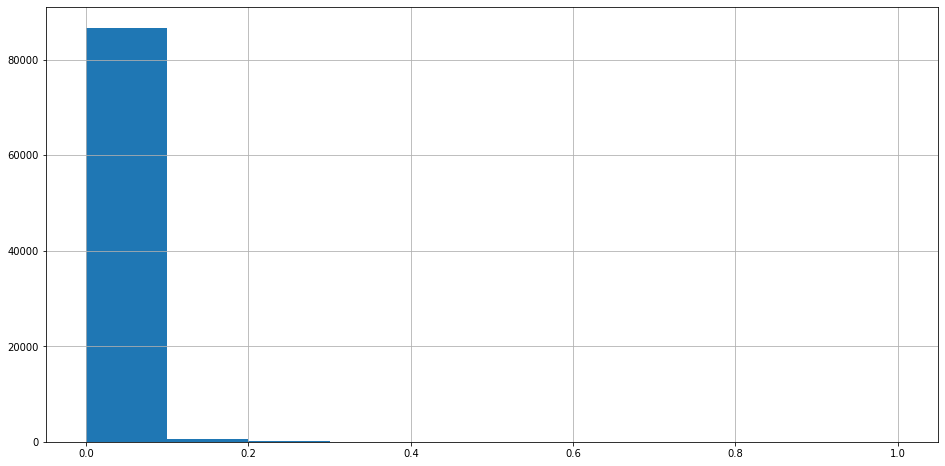

In [12]:
Normilized_data[Normilized_data["fraud"] == 1]["distance_from_last_transaction"].hist(figsize=(16, 8))

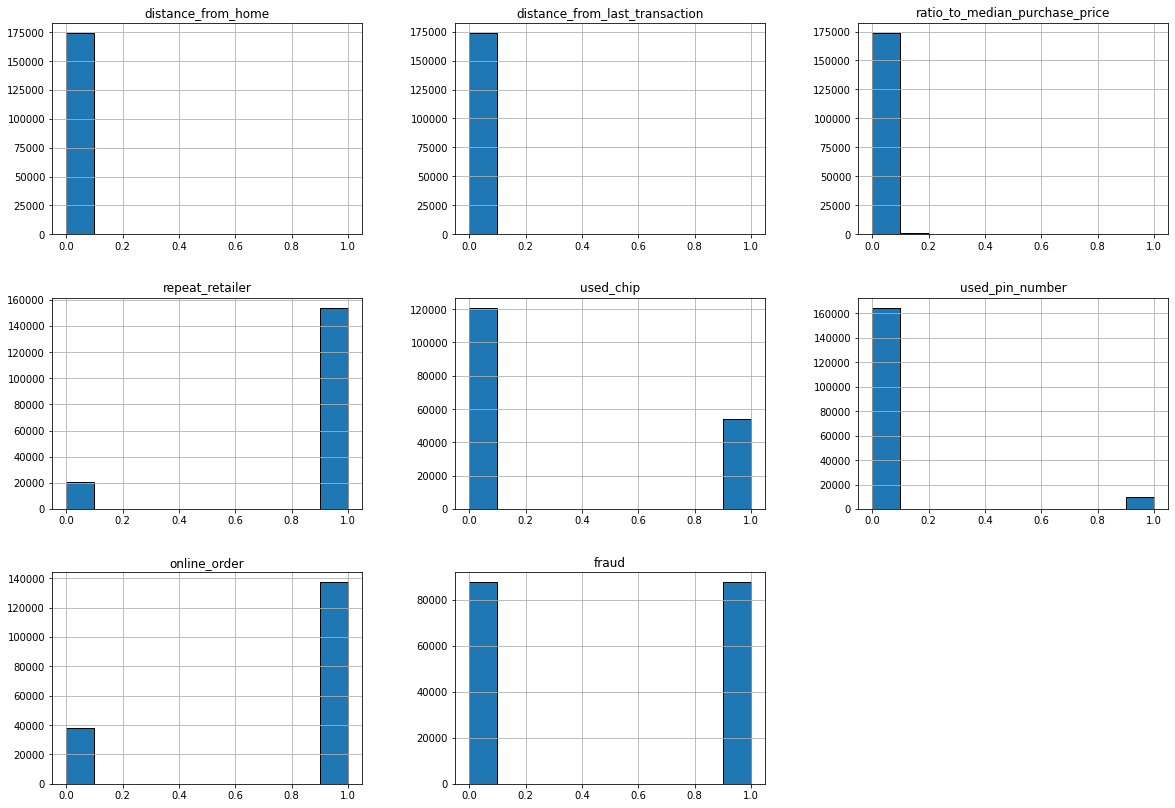

In [13]:
Normilized_data.hist(figsize=(20,14), edgecolor="black")
plt.show()

In [14]:
q3_data = ThreeQRule(Normilized_data).get_data()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().